In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(256, 256)


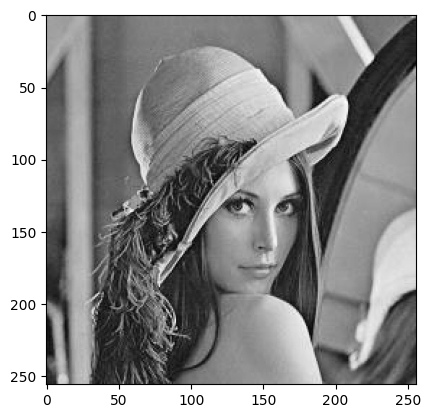

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
plt.imshow(gimg, cmap='gray')
#cv2_imshow(gimg)

In [ ]:
gOutimg = np.zeros((gimg.shape[0], gimg.shape[1]))

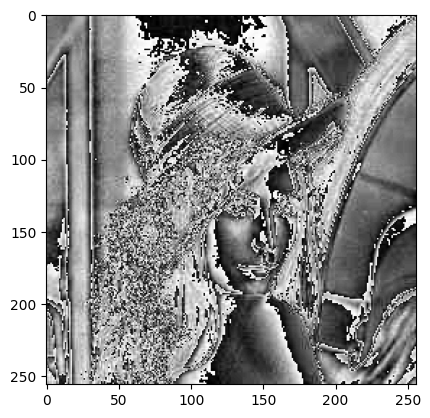

In [ ]:
for h in range(0, gimg.shape[0]):
  for w in range(0, gimg.shape[1]):
    val = gimg[h,w] % 64
    val = val * 4
    gOutimg[h,w] = val

  plt.imshow(gOutimg, cmap = 'gray')
  #cv2_imshow(gOutimg)

In [ ]:
equalVal = 200
width = 5
min = equalVal - width
max = equalVal + width

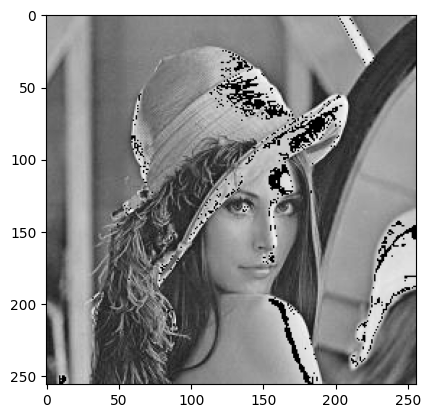

In [ ]:
for h in range(0, gimg.shape[0]):
  for w in range(0, gimg.shape[1]):
    if(gimg[h,w] > min and gimg[h,w] < max):
      gOutimg[h,w] = 0
    else:
      gOutimg[h,w] = gimg[h,w]

  plt.imshow(gOutimg, cmap = 'gray')

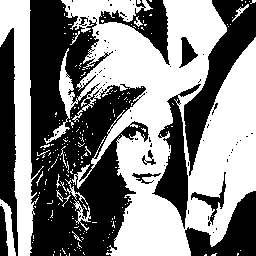

In [ ]:
for h in range(0, gimg.shape[0]):
  for w in range(0, gimg.shape[1]):
    imVal = (int)(gimg[h,w] / 128)
    if(imVal == 0):
      gOutimg[h,w] = imVal
    else:
      gOutimg[h,w] = 255

cv2_imshow(gOutimg)

In [ ]:
planeNumber = 8
planeValue = 1

for i in range(planeNumber-1):
  planeValue = planeValue * 2

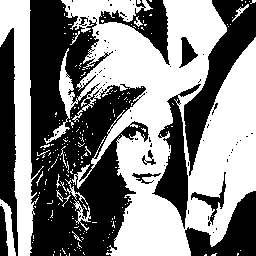

In [ ]:
for h in range(0, gimg.shape[0]):
  for w in range(0, gimg.shape[1]):
    imVal = (int)(gimg[h,w] / planeValue)
    if(imVal % 2 == 0):
      gOutimg[h,w] = 0
    else:
      gOutimg[h,w] = 255

cv2_imshow(gOutimg)

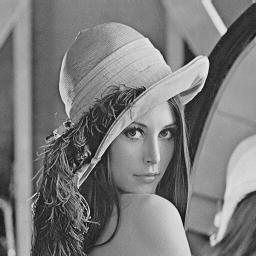

In [ ]:
gWatermarker = gimg.copy()
for h in range(0, gimg.shape[0]):
  for w in range(0, gimg.shape[1]):
    imVal = gimg2[h,w]
    if(imVal > 128):
      if(gimg[h,w] % 2 == 0):
        gWatermarker[h,w] += 1

      else:
        if(gimg[h,w] % 2 == 1):
          gWatermarker[h,w] -= 1



cv2_imshow(gWatermarker)

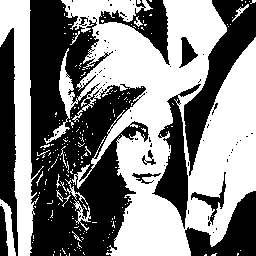

In [ ]:
for h in range(0, gWatermarker.shape[0]):
  for w in range(0, gWatermarker.shape[1]):
    imVal = (int)(gWatermarker[h,w] / 128)
    if(imVal == 0):
      gOutimg[h,w] = 0
    else:
      gOutimg[h,w] = 255

cv2_imshow(gOutimg)